In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [64]:
btc_csv = pd.read_csv("coinbaseUSD.csv", skiprows = None)

In [65]:
btc_csv.info()

btc_np = btc_csv.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18192816 entries, 0 to 18192815
Data columns (total 3 columns):
1417412036          int64
300.000000000000    float64
0.010000000000      float64
dtypes: float64(2), int64(1)
memory usage: 416.4 MB


In [66]:
timestamps = btc_np[:, 0]
rolled_timestamps = np.roll(timestamps, 1)

timestamps = timestamps[1:-1]
rolled_timestamps = rolled_timestamps[1:-1]

In [79]:
deltas = timestamps - rolled_timestamps

In [118]:
print(np.min(deltas))
print(np.max(deltas))
print(np.mean(deltas))
print(np.median(deltas))
print(np.std(deltas))

0.0
1744025.0
4.5578528973
0.0
453.512367144


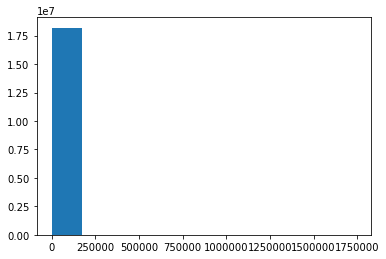

In [87]:
plt.hist(delta)
plt.show()

In [126]:
sanitized = np.empty((0,2))

[]


In [130]:
TIMESTEP = 500

current_timestamp = btc_np[0, 0]
current_price = btc_np[0, 1]

for x in btc_np[1:]:
    target_timestamp = x[0]
    
    while current_timestamp < target_timestamp:
        row = [[current_timestamp, current_price]]
        sanitized = np.append(sanitized, row, axis = 0)
        current_timestamp += TIMESTEP
    
    current_price = x[1]